# Projeto Machine Learning

Glossário do conjunto de dados (em colunas)

- ID do cliente – identificador exclusivo para cada cliente
- Idade - Idade do cliente
- Gênero - Gênero do cliente (Masculino/Feminino)
- Item comprado - O item comprado pelo cliente
- Categoria - Categoria do item adquirido
- Valor da compra (USD) - O valor da compra em USD
- Local – Local onde a compra foi realizada
- Tamanho - Tamanho do item adquirido
- Cor – Cor do item adquirido
- Temporada - Temporada durante a qual a compra foi feita
- Avaliação de revisão - Classificação dada pelo cliente para o item comprado
- Status da Assinatura - Indica se o cliente possui uma assinatura (Sim/Não)
- Tipo de Envio - Tipo de envio escolhido pelo cliente
- Desconto Aplicado - Indica se foi aplicado desconto na compra (Sim/Não)
- Código Promocional Usado - Indica se um código promocional foi usado para a compra (Sim/Não)
- Compras Anteriores - Número de compras anteriores realizadas pelo cliente
- Método de pagamento - método de pagamento preferido do cliente
- Frequência de Compras - Frequência com que o cliente faz compras (por exemplo, Semanal, Quinzenal, Mensal)

In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
local = True

caminho = "./datasets/marketing_campaign (1).csv" if local else '/content/drive/MyDrive/Projeto - Machine Learning II/shopping_trends.csv'

df = pd.read_csv(caminho, sep="\t")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Conhecendo os Dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
# Percorrer colunas categóricas para a contagem de valores exclusivos

unique_value_counts = {}

for column in df.select_dtypes(include=['object']):
    unique_values = df[column].nunique()
    unique_value_counts[column] = unique_values

print(unique_value_counts)

{'Education': 5, 'Marital_Status': 8, 'Dt_Customer': 663}


In [7]:
# Percorrer colunas numéricas para a contagem de valores exclusivos

unique_value_counts = {}

for column in df.select_dtypes(include=['int64', 'float']):
    unique_values = df[column].nunique()
    unique_value_counts[column] = unique_values

print(unique_value_counts)

{'ID': 2240, 'Year_Birth': 59, 'Income': 1974, 'Kidhome': 3, 'Teenhome': 3, 'Recency': 100, 'MntWines': 776, 'MntFruits': 158, 'MntMeatProducts': 558, 'MntFishProducts': 182, 'MntSweetProducts': 177, 'MntGoldProds': 213, 'NumDealsPurchases': 15, 'NumWebPurchases': 15, 'NumCatalogPurchases': 14, 'NumStorePurchases': 14, 'NumWebVisitsMonth': 16, 'AcceptedCmp3': 2, 'AcceptedCmp4': 2, 'AcceptedCmp5': 2, 'AcceptedCmp1': 2, 'AcceptedCmp2': 2, 'Complain': 2, 'Z_CostContact': 1, 'Z_Revenue': 1, 'Response': 2}


## Limpeza dos Dados

In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df[df.duplicated()].sum()

ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                 0.0
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
dtype: object

## Análise Exploratória

Cerca de 88% de nossos clientes se formaram ou mais, o que nos dá uma boa dica sobre as faixas etárias que podemos observar.
- Extrair a “Idade” de um cliente pelo “Year_Birth” indicando o ano de nascimento da respectiva pessoa
- Substituir  "Alone" por "Single".

Parece que certos indivíduos não responderam positivamente às perguntas sobre este assunto.

Se verificarmos que esta coluna em particular carece de um valor informativo substancial, pode ser prudente contemplar a sua omissão.

Engenharia de recursos:
Uma abordagem poderia envolver a categorização de instâncias rotuladas como

- "YOLO" e "Absurdo" como "Single".
- Simplificar a coluna `Marital Status`, categorizando como "Partner" ou "Not Partner"

- Mesma abordagem para a coluna `Graduated`, categorizando-a em "Post Graduated" "Graduated" ou "Not Graduated".

In [10]:
df_copy = df.copy()

In [11]:
def initial_cleaning(df):
    """Do the initial changes describe it above"""
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format="%d-%m-%Y")
    df['Marital_Status'] = df.loc[:,'Marital_Status'].str.replace('Alone','Single')
    df['Marital_Status'] = df.loc[:,'Marital_Status'].apply(lambda x: "Single" if x == 'YOLO' or x == 'Absurd' else x)
    df["Children"]=df["Kidhome"]+df["Teenhome"]
    return df

df_copy = initial_cleaning(df_copy)

In [12]:
from datetime import datetime

# Obtém o ano atual
ano_atual = datetime.now().year

def feat_engineering(df):
    not_graduated = ['Basic','2n cycle']
    post_graduated = ['Master','PhD']
    couple = ['Married','Together']
    df['Age'] = ano_atual - df['Year_Birth']
    df['Education'] = df['Education'].apply(lambda x: 'Not Graduated' if x in not_graduated else ('Post Graduated' if x in post_graduated else 'Graduated'))
    df['Partner'] = df['Marital_Status'].apply(lambda x: 'Partner' if x in couple else 'Not Partner')
    df["Family_Size"] = df["Partner"].replace({"Not Partner": 1, "Partner":2})+ df["Children"]

    df.drop(['Marital_Status','Year_Birth','ID','Z_CostContact','Z_Revenue', 'Dt_Customer'], axis=1, inplace=True)

    return df

df_copy = feat_engineering(df_copy);

In [13]:
df_copy.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Age,Partner,Family_Size
0,Graduated,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,66,Not Partner,1
1,Graduated,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,69,Not Partner,3
2,Graduated,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,58,Partner,2
3,Graduated,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,39,Partner,3
4,Post Graduated,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,42,Partner,3


In [14]:
sns.set_theme(context= 'notebook')
sns.set_style('dark')
sns.set(rc={'axes.grid':False})
sns.set_palette('mako')

In [15]:
def num_plot(df, col):
  """Graph an histogram with a boxplot above
	for one numerical column"""
  fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,4),gridspec_kw={"height_ratios": (.2, .8)})
  sns.boxplot(x=col, data=df, ax=ax[0], color='#7171cf', linewidth=1.5)
  ax[0].set_xlabel(None)
  ax[0].set(yticks=[])
  sns.histplot(x=col, data=df, ax=ax[1], alpha=.6, color='#7171cf')
  ax[1].set_xlabel(col.replace('_',' ').title(), fontsize=22, loc= 'left')
  plt.axvline(df[col].mean(), color='#39568CFF', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)))
  plt.axvline(df[col].median(), color='#1F968BFF', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)))
  plt.axvline(df[col].mode()[0], color='#440154FF', linewidth=2.2, label='mode='+ str(df[col].mode()[0]))
  plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=10, fancybox=True, shadow=True, frameon=True)
  plt.tight_layout()
  return ax

def countplot_catcols(df,column,width,height):
	"""Count frequency for each group"""
	fig, ax  = plt.subplots(figsize=(width,height))
	ax=sns.countplot(y=column, data=df,
                  palette='viridis',
                  orient='h',
				  order = df[column].value_counts().index)
	ax.set_xticklabels(ax.get_xticklabels())
	ax.bar_label(ax.containers[0])
	ax.set_title(f'Frequency of {column} categories', loc='left', size=18)
	plt.tight_layout()
	return ax

def barplot_category(df,x,y,title):
  """Plot a barplot"""
  fig, ax  = plt.subplots(figsize=(8,2))
  ax  = sns.barplot(data=df, x=x, y=y,
              orient='h', palette='mako',
              seed=2)
  plt.title(title, loc='left', size=16)
  return ax

### Perfil dos clientes

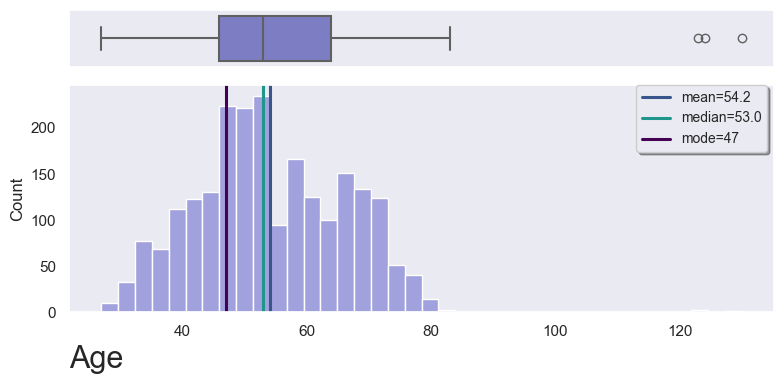

In [16]:
num_plot(df_copy, 'Age')
plt.show()

In [17]:
age_clusters = pd.cut(df_copy.Age, [-np.inf,30,60,np.inf],
                      labels=['Young','Adult','Elderly'])
age_clusters.value_counts(normalize=True).sort_index()

Age
Young      0.006696
Adult      0.681250
Elderly    0.312054
Name: proportion, dtype: float64

In [18]:
df_copy['Age_Category'] = age_clusters

Aproximadamente 76% da nossa base de clientes tem entre 30 e 60 anos. Isso indica que a faixa etária predominante entre nossos clientes se enquadra na categoria adulta.

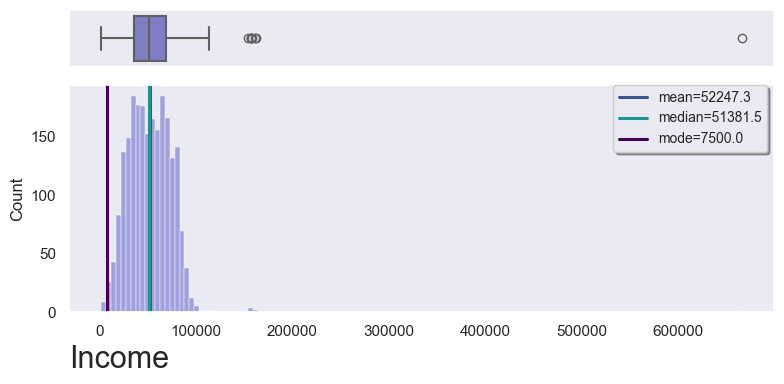

In [19]:
num_plot(df_copy, 'Income')
plt.show()

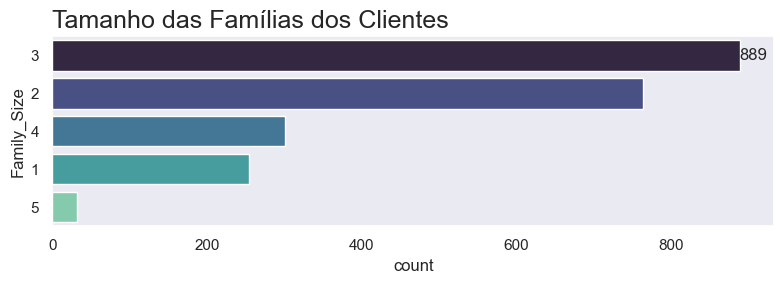

In [20]:
fig, ax  = plt.subplots(figsize=(8,3))
ax=sns.countplot(y='Family_Size', data=df_copy,
                  palette='mako',
                  orient='h',
				  order = df_copy['Family_Size'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels())
ax.bar_label(ax.containers[0])
ax.set_title('Tamanho das Famílias dos Clientes', loc='left', size=18)
plt.tight_layout()
plt.show()

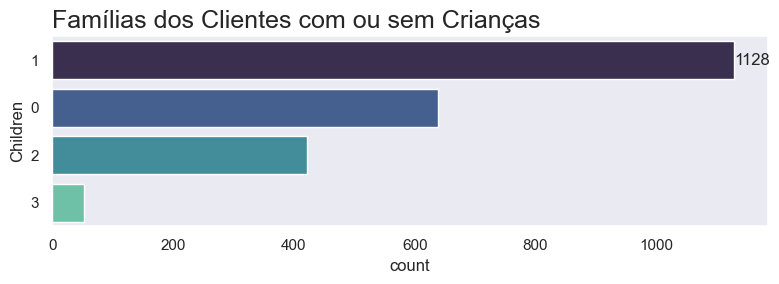

In [21]:
fig, ax  = plt.subplots(figsize=(8,3))
ax=sns.countplot(y='Children', data=df_copy,
                  palette='mako',
                  orient='h',
				  order = df_copy['Children'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels())
ax.bar_label(ax.containers[0])
ax.set_title('Famílias dos Clientes com ou sem Crianças', loc='left', size=18)
plt.tight_layout()
plt.show()

Maioria dos clientes no conjunto de dados tem apenas um ou menos jovens (adolescentes ou crianças) em casa.

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

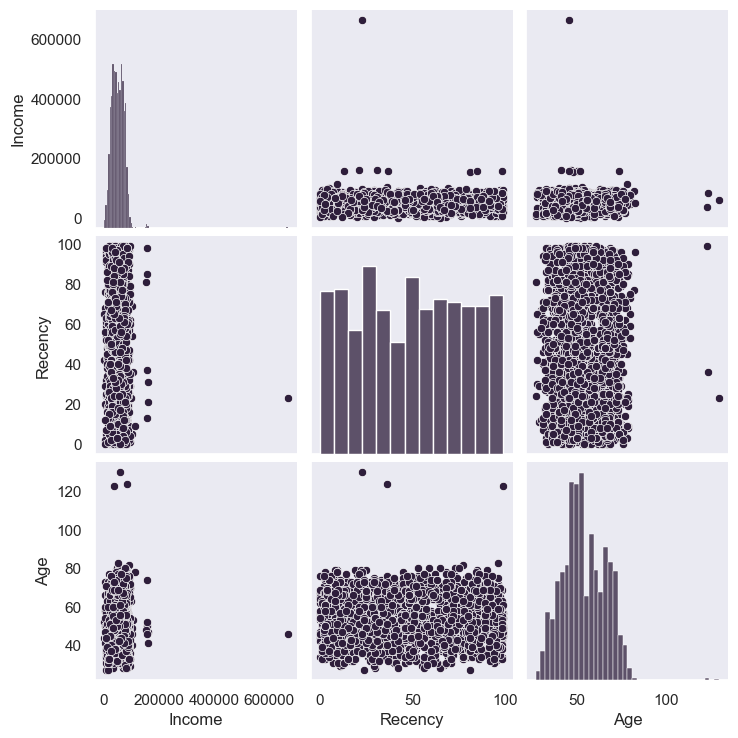

In [22]:
To_Plot = [ "Income", "Recency", "Age"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df_copy[To_Plot],palette= (["#682F2F","#F3AB60"]))

plt.show()

É possível perceber alguns outliers nas colunas de Idade ('Age') e Renda ('Income'). Logo farei a exclusão.

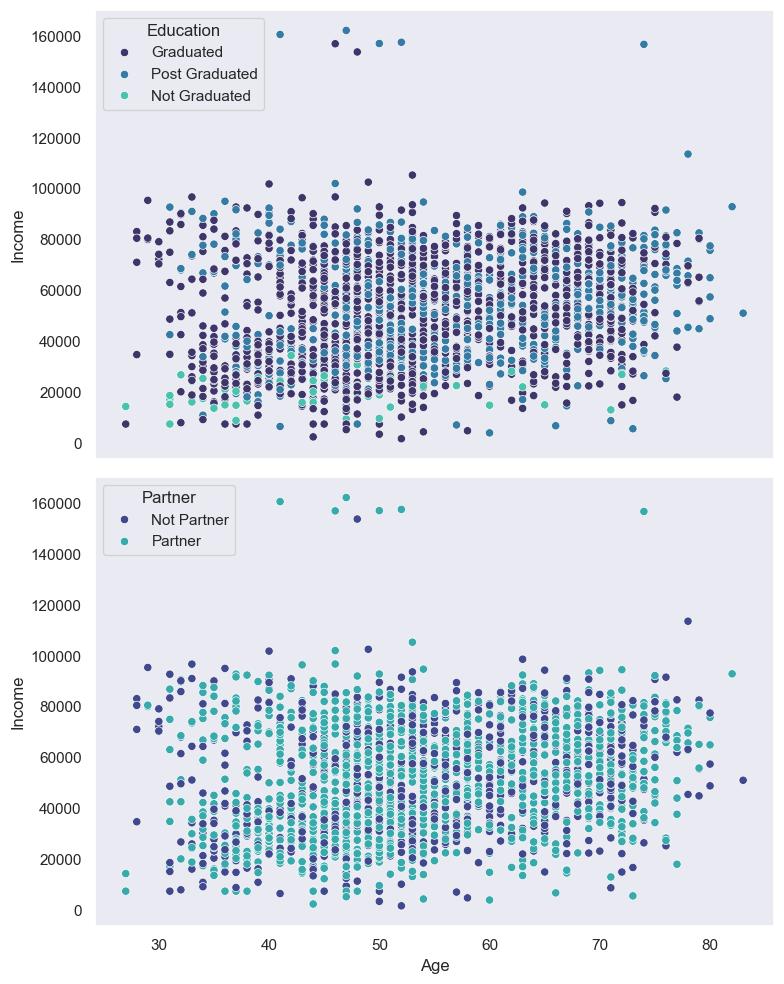

In [23]:
df_without_outliers = df_copy.loc[(df_copy.Age < 100) & (df_copy.Income < 600_000)]

fig, ax = plt.subplots(2,1, figsize=(8,10), sharex=True)
sns.scatterplot(data=df_without_outliers,
                x='Age',
                y='Income',
                hue='Education',
                palette='mako',
               ax=ax[0])

sns.scatterplot(data=df_without_outliers,
                x='Age',
                y='Income',
                hue='Partner',
                palette='mako',
               ax=ax[1])
plt.tight_layout()
plt.show()


### Que padrões podemos encontrar no seu comportamento de consumo?

In [24]:
products_subset = df_copy.loc[:, :'MntGoldProds'].drop(['Kidhome','Teenhome'], axis=1)
demographic_subset = df_copy[['Age','Age_Category','Partner']]

purchase = pd.concat([products_subset, demographic_subset], axis=1)

purchase['MntTotal'] = purchase.loc[:,'MntWines':'MntGoldProds'].sum(1)

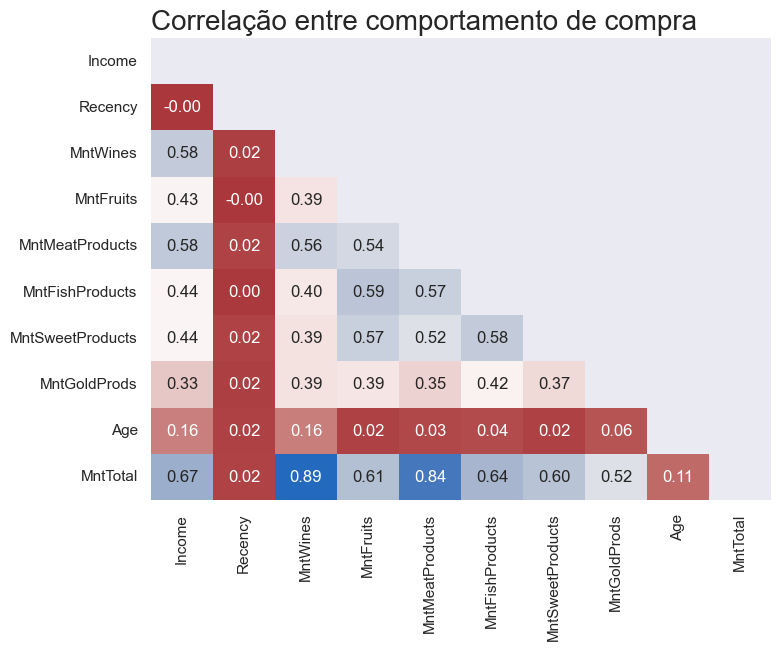

In [25]:
purchase_numbers = purchase.select_dtypes('number')
plt.figure(figsize=(8,6))
mask = np.triu(np.ones_like(purchase_numbers.corr(), dtype=bool))
sns.heatmap(purchase_numbers.corr(), annot=True, cmap='vlag_r', fmt='.2f', cbar=False, mask=mask)
plt.title('Correlação entre comportamento de compra', size=20, loc='left')
plt.show()

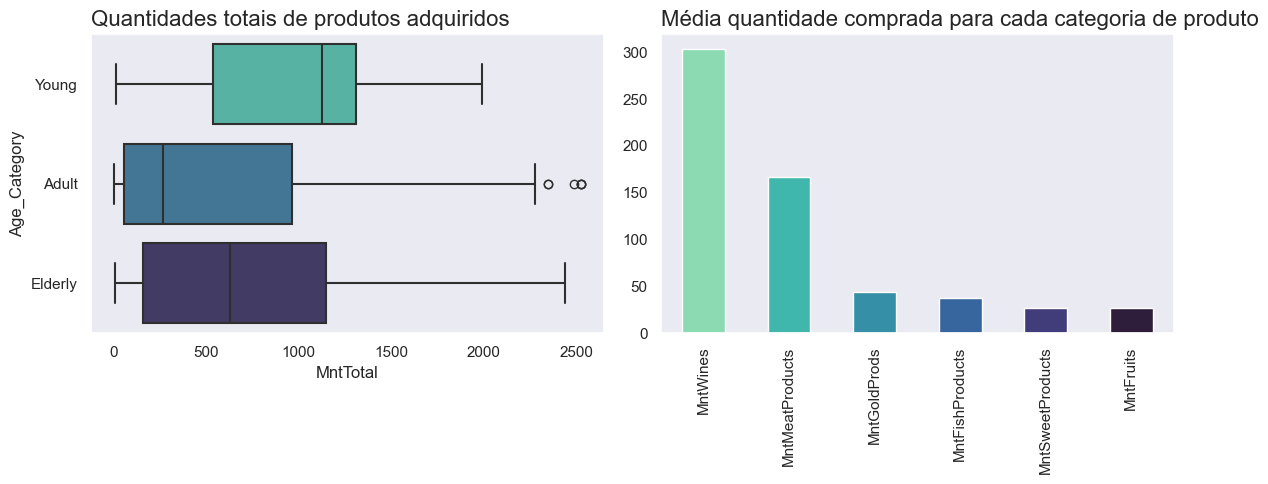

In [26]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.boxplot(x='MntTotal',
            y='Age_Category',
            data=purchase,
            palette='mako_r',
            linewidth=1.5,
           ax=ax[0])
ax[0].set_title('Quantidades totais de produtos adquiridos', loc='left', size=16)

df_copy.loc[:,'MntWines':'MntGoldProds'].mean().sort_values(ascending=False)\
    .plot(kind='bar',
          color=sns.color_palette('mako_r'),
         ax=ax[1])
ax[1].set_title('Média quantidade comprada para cada categoria de produto', size=16, loc='left')

plt.tight_layout()
plt.show()

É evidente que existe uma correlação entre a quantidade de produtos adquiridos e a idade do cliente, que por sua vez está ligada à sua renda. Geralmente, uma idade mais elevada corresponde a rendimentos mais elevados e a maiores compras de produtos.

Como observamos antes, há definitivamente um vencedor claro quando se trata de vendas. No entanto, embora a quantidade de produtos relacionados à carne seja quase metade, eles ainda apresentam números impressionantes.

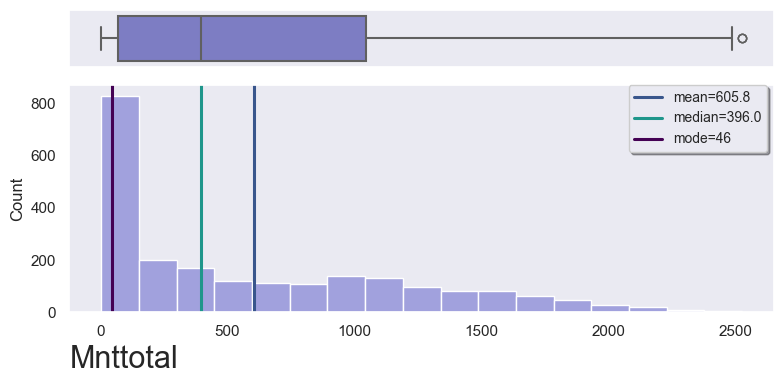

In [27]:
df_copy['MntTotal'] = df_copy.loc[:,'MntWines':'MntGoldProds'].sum(1)

num_plot(purchase,'MntTotal')
plt.show()

In [28]:
products = ['MntWines','MntFruits','MntMeatProducts',
            'MntFishProducts','MntSweetProducts','MntGoldProds','MntTotal']

purchase.groupby('Partner')[products].mean().astype(int).style.background_gradient(cmap='vlag_r')

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal
Partner,,,,,,,
Not Partner,306,27,172,38,28,46,620
Partner,302,25,163,36,26,42,597


In [29]:
temp_df = pd.pivot_table(purchase, index='Partner', columns='Age_Category', values='MntTotal', aggfunc='mean')
print('Avg. Total amount purchased:')
temp_df.fillna(0).astype(int).style.background_gradient(cmap='vlag_r')

Avg. Total amount purchased:


Age_Category,Young,Adult,Elderly
Partner,,,
Not Partner,1068,557,732
Partner,630,545,712


Clientes sem parceiro tendem a gastar mais na maioria das categorias, exceto em vinhos, onde a diferença é pequena. Isto provavelmente se deve à inclusão de clientes viúvos neste grupo, que normalmente têm mais de 60 anos e fazem parte do grupo demográfico com maiores gastos.

#### E a relação dos clientes com os estabelecimentos? Como participação em campanhas ou reclamações e feedbacks

In [30]:
%pip install squarify

Note: you may need to restart the kernel to use updated packages.


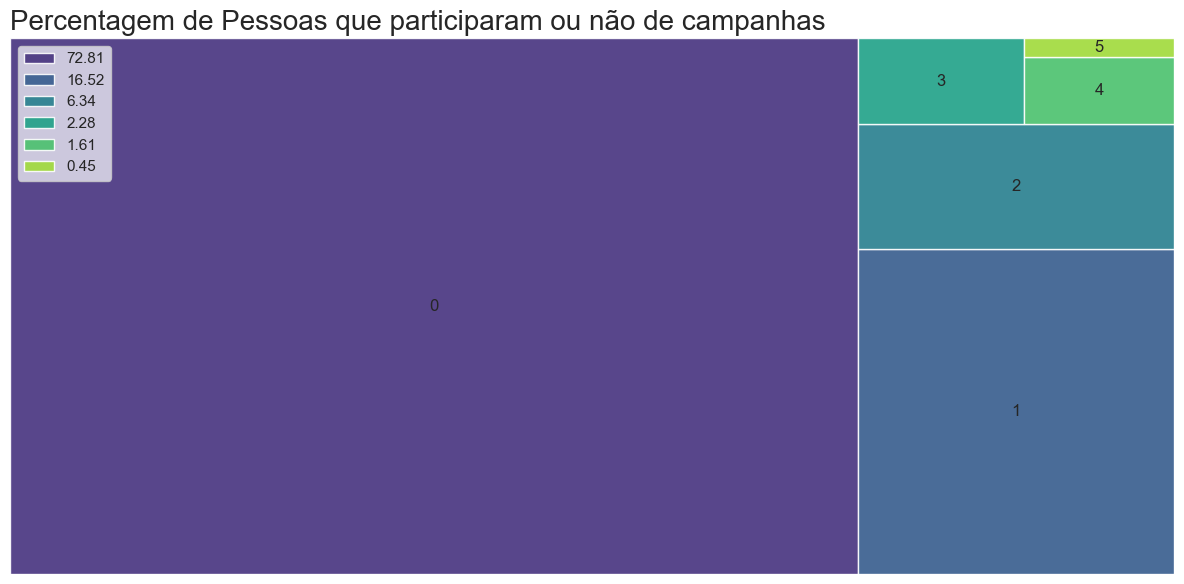

In [31]:
import squarify
campaigns = df_copy.loc[:,'AcceptedCmp3':'Response'].drop('Complain', axis=1)

people_acceptance = campaigns.sum(1).value_counts(normalize=True).sort_values(ascending=False)

plt.figure(figsize=(12,6))
squarify.plot(sizes=people_acceptance, label=people_acceptance.index,
              color=sns.color_palette('viridis',len(people_acceptance)),
              alpha=.9)
plt.legend(np.round(people_acceptance*100,2))
plt.axis('off')
plt.title('Percentagem de Pessoas que participaram ou não de campanhas', loc='left', size=20)
plt.tight_layout()
plt.show()

Aproximadamente 73% dos clientes nunca aceitaram nem mesmo uma única campanha de marketing.

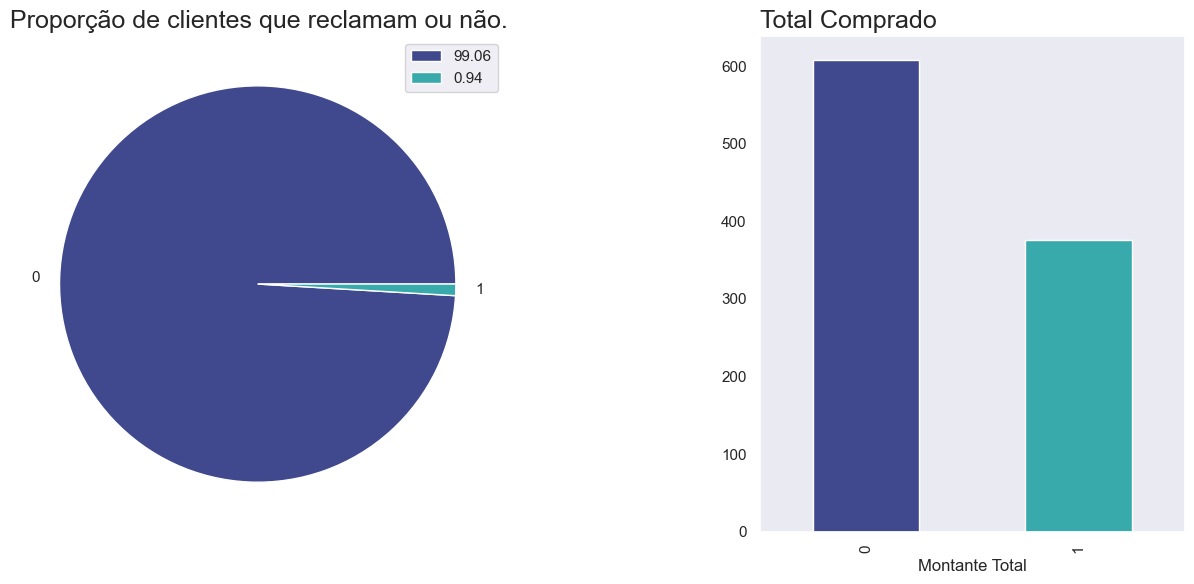

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), gridspec_kw={'width_ratios': [3, 1]})

df_copy.loc[:, 'Complain'].value_counts().plot(kind='pie', ax=axes[0], colors=sns.color_palette('mako', 2))
axes[0].set_title('Proporção de clientes que reclamam ou não.', size=18, loc='left')
axes[0].legend(np.round(df_copy.loc[:, 'Complain'].value_counts(normalize=True) * 100, 2))
axes[0].axis('off')

df_copy.groupby('Complain')['MntTotal'].mean().plot(kind='bar', color=sns.color_palette('mako', 2), ax=axes[1])
axes[1].set_title('Total Comprado', size=18, loc='left')
axes[1].set_xlabel('Montante Total')

plt.tight_layout()
plt.show()

- 0 não reclama
- 1 reclama
- Menos de 1% dos clientes reclamaram.
- Como esperado, os clientes que reclamaram gastaram menos.

# Thiago - XGBoost
---

In [33]:
import seaborn as sns
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing




## Análise inicial e tratamento do dataset


Carregando o arquivo correto que representa o dataset

In [34]:
df_t = pd.read_csv("./datasets/dataset_cluster (3).csv")

In [35]:
df_t.shape

(2212, 36)

In [36]:
df_t

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Age,Partner,Family_Size,Age_Category,MntTotal,cluster,Cluster
0,5524,1957,Graduated,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,66,Not Partner,1,Elderly,1617,1,1
1,2174,1954,Graduated,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,69,Not Partner,3,Elderly,27,3,3
2,4141,1965,Graduated,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,58,Partner,2,Adult,776,2,2
3,6182,1984,Graduated,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,39,Partner,3,Adult,53,0,0
4,5324,1981,Post Graduated,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,42,Partner,3,Adult,422,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,10870,1967,Graduated,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,1,56,Partner,3,Adult,1341,2,2
2208,4001,1946,Post Graduated,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,3,77,Partner,5,Elderly,444,3,3
2209,7270,1981,Graduated,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,0,42,Not Partner,1,Adult,1241,1,1
2210,8235,1956,Post Graduated,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,1,67,Partner,3,Elderly,843,3,3


Eliminaremos colunas duplicadas no dataset e adicionaremos os dummies das features exclusivamente categóricas

In [37]:
# Eliminando a coluna de data de cadastro do cliente
df_t = df_t.drop(columns=["Dt_Customer"])

# Eliminando a coluna de cluster duplicada
df_t = df_t.drop(columns=["cluster"])

In [38]:
cat_columns = df_t.select_dtypes(include=["object"]).columns.values
df_t = pd.get_dummies(df_t, columns = cat_columns, prefix = cat_columns)
df_t

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Age,Family_Size,MntTotal,Cluster,Education_Graduated,Education_Not Graduated,Education_Post Graduated,Partner_Not Partner,Partner_Partner,Age_Category_Adult,Age_Category_Elderly,Age_Category_Young
0,5524,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,66,1,1617,1,True,False,False,True,False,False,True,False
1,2174,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,69,3,27,3,True,False,False,True,False,False,True,False
2,4141,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,58,2,776,2,True,False,False,False,True,True,False,False
3,6182,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,39,3,53,0,True,False,False,False,True,True,False,False
4,5324,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,42,3,422,2,False,False,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,10870,1967,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,1,56,3,1341,2,True,False,False,False,True,True,False,False
2208,4001,1946,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,3,77,5,444,3,False,False,True,False,True,False,True,False
2209,7270,1981,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,0,42,1,1241,1,True,False,False,True,False,True,False,False
2210,8235,1956,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,1,67,3,843,3,False,False,True,False,True,False,True,False


## Treinamento inicial e primeiras tentativas com o modelo

Separando os dados em treino e teste

In [39]:
df_X = df_t.drop(["Cluster"], axis=1)

df_y = df_t["Cluster"]

X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_y, random_state=42)

Verificando a proporção da divisão entre os dados de treino e teste

In [40]:
X_test.shape[0]/X_train.shape[0]

0.3333333333333333

Instanciando o primeiro classificador e verificando que ele é baseado no sklearn

In [41]:
classificador_xgb = xgb.XGBClassifier()
type(classificador_xgb)

xgboost.sklearn.XGBClassifier

Observando o resultado inicial do cross_val_score, para observar como o modelo performa em diferentes cenários e tirando a média

In [42]:
from sklearn.model_selection import cross_val_score
resultado_cv = cross_val_score(classificador_xgb, X_train, Y_train, cv=10)
resultado_cv

array([0.96385542, 0.9939759 , 0.96987952, 0.95180723, 0.96385542,
       0.96987952, 0.97590361, 0.95783133, 0.98192771, 0.92727273])

Definidindo a primeira medida de acurácia

In [43]:

acuracia_cv = resultado_cv.mean()
acuracia_cv = 100*round(acuracia_cv, 4)
acuracia_cv

96.56

Observando que a instância do classificador detecta automaticamente que estamos utilizando mais de uma classe como target

In [44]:
classifier = xgb.XGBClassifier()
classifier.objective


'binary:logistic'

In [45]:
classifier = xgb.XGBClassifier().fit(X_train, Y_train)
classifier.objective

'multi:softprob'

Observando o cross_val_score com a max_depth alterada

In [46]:
classificador_xgb_max_depth = xgb.XGBClassifier(max_depth=2)

100*cross_val_score(classificador_xgb_max_depth, X_train, Y_train).mean()

96.92443489971974

## Definindo as funções de visualização gráfica do modelo

In [47]:
def fit(model, x=X_train, y=Y_train):
    return model.fit(x, y)


def matrix(model, x=X_test, y=Y_test):
    predict = model.predict(x)
    return metrics.confusion_matrix(y, predict, normalize="pred")

def accuracy(model, x=X_test, y=Y_test):
    predict = model.predict(x)
    return metrics.accuracy_score(y, predict)


def c_report(model, x=X_test, y=Y_test):
    predict = model.predict(x)
    report = metrics.classification_report(y, predict)
    return report

def plot_matrix(model, xt=X_test, yt=Y_test, xtr=X_train, ytr=Y_train, treino=False):
    (x, y) = (xtr, ytr) if treino else (xt, yt)
    cm = matrix(model, x, y)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, vmin=0, vmax=1)
    plt.ylabel("Realidade", size=14)
    plt.xlabel("Previsão", size=14)
    titulo = f"Métricas de Precisão\n\nAccuracy Score: {accuracy(model, x, y)*100:.2f}"
    plt.title(titulo, size=15)
    plt.show()

    print(c_report(model, x, y))


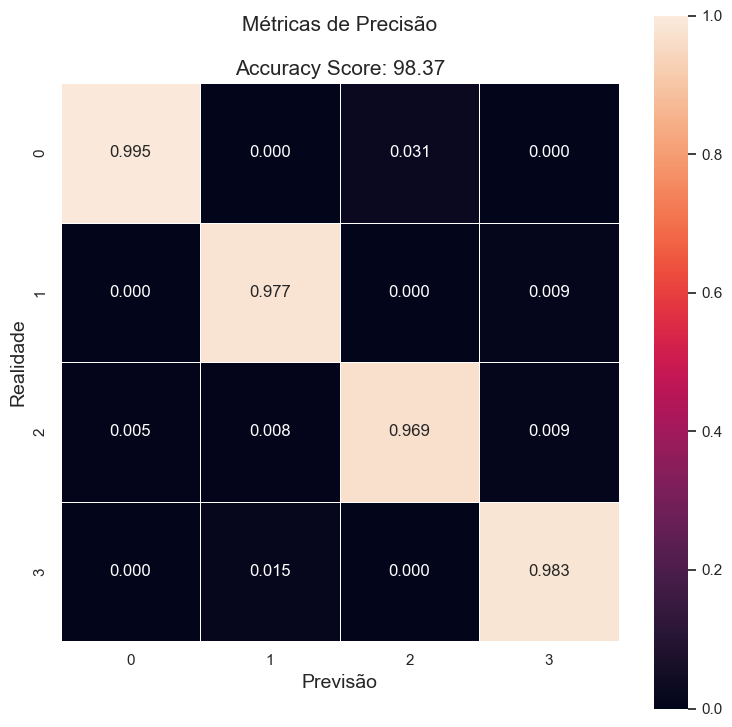

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       207
           1       0.98      0.99      0.98       131
           2       0.97      0.97      0.97        98
           3       0.98      0.98      0.98       117

    accuracy                           0.98       553
   macro avg       0.98      0.98      0.98       553
weighted avg       0.98      0.98      0.98       553



In [48]:
modelo = fit(classificador_xgb_max_depth)

plot_matrix(modelo)

Observando os dados na divisão de treino do dataset (alto overfit)

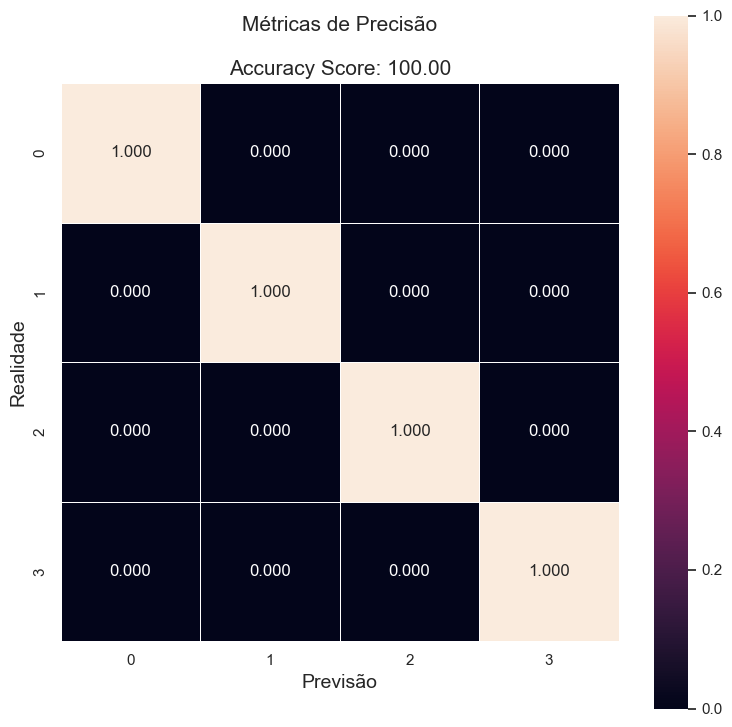

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       612
           1       1.00      1.00      1.00       361
           2       1.00      1.00      1.00       317
           3       1.00      1.00      1.00       369

    accuracy                           1.00      1659
   macro avg       1.00      1.00      1.00      1659
weighted avg       1.00      1.00      1.00      1659



In [49]:
plot_matrix(modelo, treino=True)

Testando o método dart, foi observado um grande tempo de treinamento e uma performance pior no geral

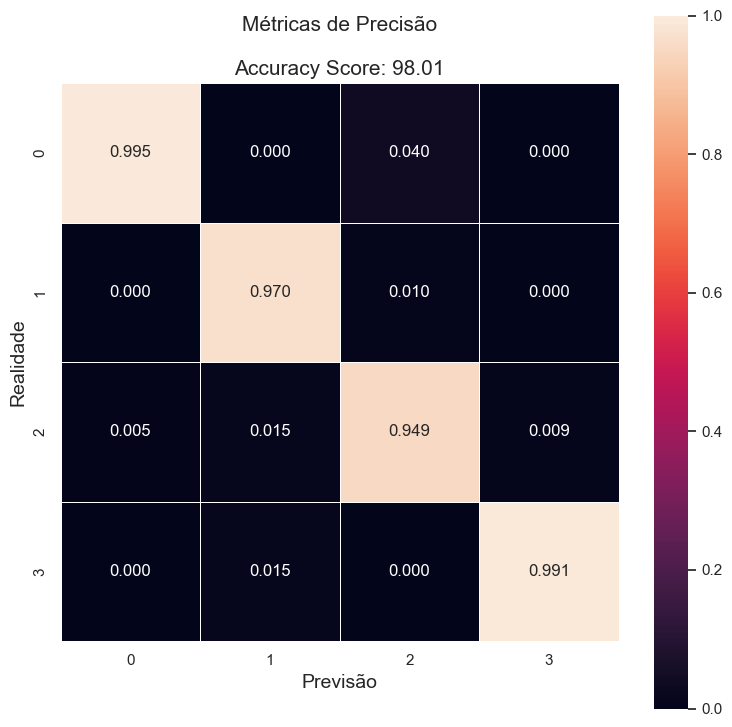

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       207
           1       0.97      0.99      0.98       131
           2       0.95      0.96      0.95        98
           3       0.99      0.98      0.99       117

    accuracy                           0.98       553
   macro avg       0.98      0.98      0.98       553
weighted avg       0.98      0.98      0.98       553



In [50]:
classificador_gbtree = xgb.XGBClassifier(booster="dart",maxdepth=2)
modelo = fit(classificador_gbtree)
plot_matrix(modelo)

## Observando o gráfico de feature importance

In [51]:
modelo = joblib.load("modelos/modelo_gs")

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

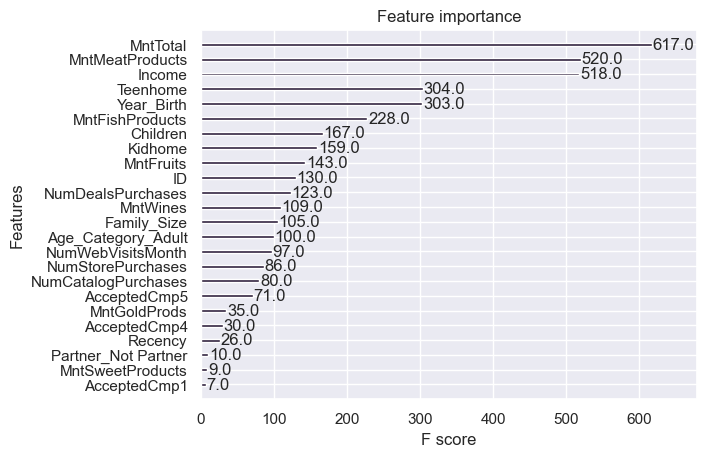

In [52]:
from xgboost import plot_importance

plot_importance(modelo)

## Executando o gridsearch


Como o modelo anterior apresentava um claro overfit, realizamos o gridsearch para buscar parâmetros diferentes e testar a performance deles


In [53]:
'''
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [4, 6, 8],
    'n_estimators': [100, 200, 300],
    'booster': ["gbtree", "dart"]
}

modelocv = xgb.XGBClassifier(n_jobs=3)

grid_search = GridSearchCV(modelocv, param_grid, cv=5, scoring='accuracy',verbose=10)

gs = grid_search.fit(X_train, Y_train)
'''

'\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'learning_rate\': [0.1, 0.01, 0.001],\n    \'max_depth\': [4, 6, 8],\n    \'n_estimators\': [100, 200, 300],\n    \'booster\': ["gbtree", "dart"]\n}\n\nmodelocv = xgb.XGBClassifier(n_jobs=3)\n\ngrid_search = GridSearchCV(modelocv, param_grid, cv=5, scoring=\'accuracy\',verbose=10)\n\ngs = grid_search.fit(X_train, Y_train)\n'

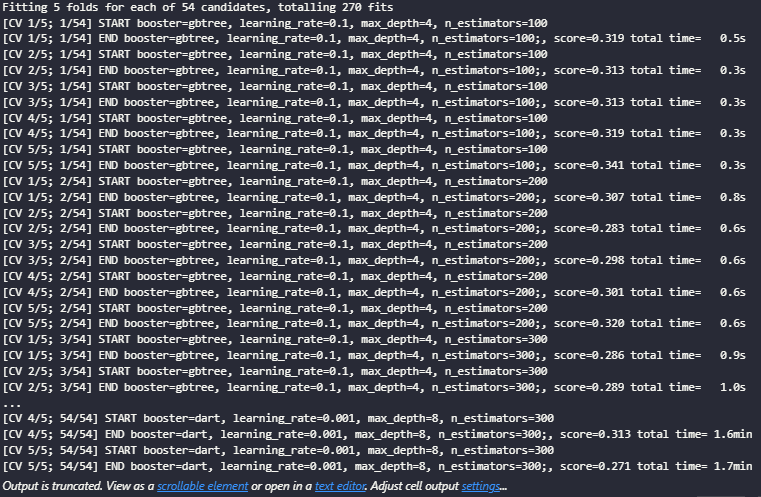

O GridSearch demorou 113min para ser completado, com o melhor modelo em:

'booster': 'gbtree',

'learning_rate': 0.01,

'max_depth': 4,

'n_estimators': 100

## Modelo final e conclusões

Carregando o modelo da persitência em disco

In [54]:
modelo = joblib.load("modelos/modelo_gs")

Plotando a matriz de confusão

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay

def confusion(model, xtest=X_test, ytest=Y_test):
    fig, ax = plt.subplots(figsize=(8,8));
    y_pred_test = model.predict(xtest)
    ConfusionMatrixDisplay.from_predictions(ytest, y_pred_test, ax=ax, cmap="magma")
    plt.title("Matriz de confusão no dataframe de teste")
    plt.show()

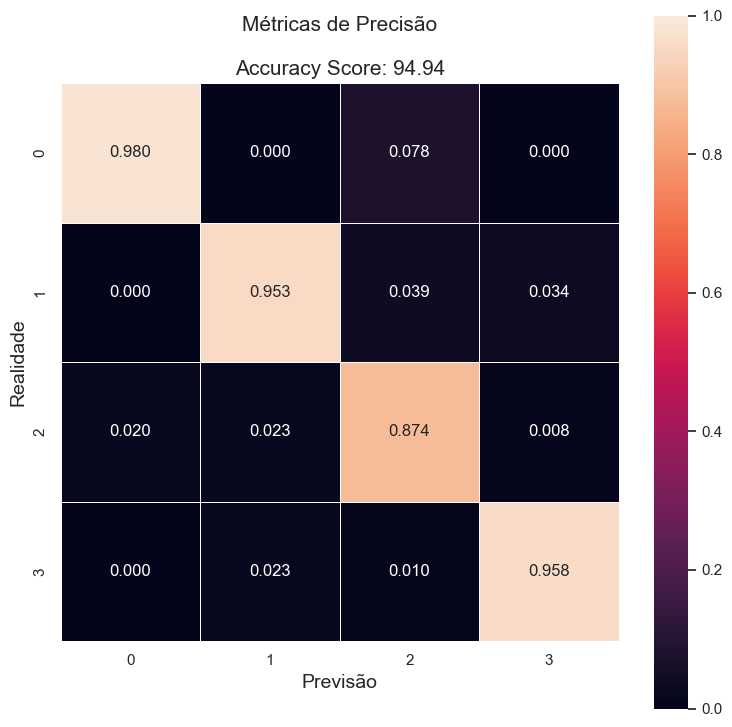

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       207
           1       0.95      0.94      0.95       131
           2       0.87      0.92      0.90        98
           3       0.96      0.97      0.96       117

    accuracy                           0.95       553
   macro avg       0.94      0.95      0.94       553
weighted avg       0.95      0.95      0.95       553



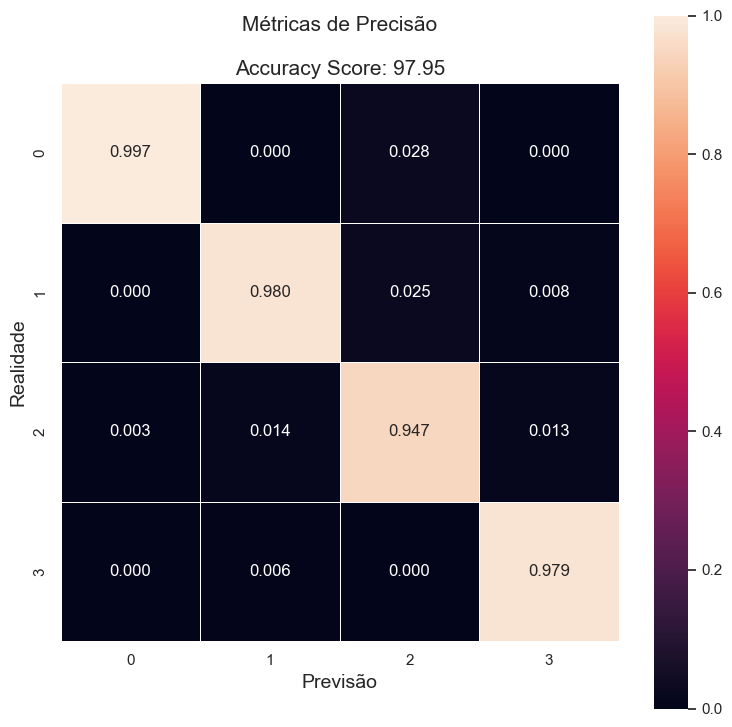

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       612
           1       0.98      0.97      0.97       361
           2       0.95      0.96      0.95       317
           3       0.98      0.99      0.99       369

    accuracy                           0.98      1659
   macro avg       0.98      0.98      0.98      1659
weighted avg       0.98      0.98      0.98      1659



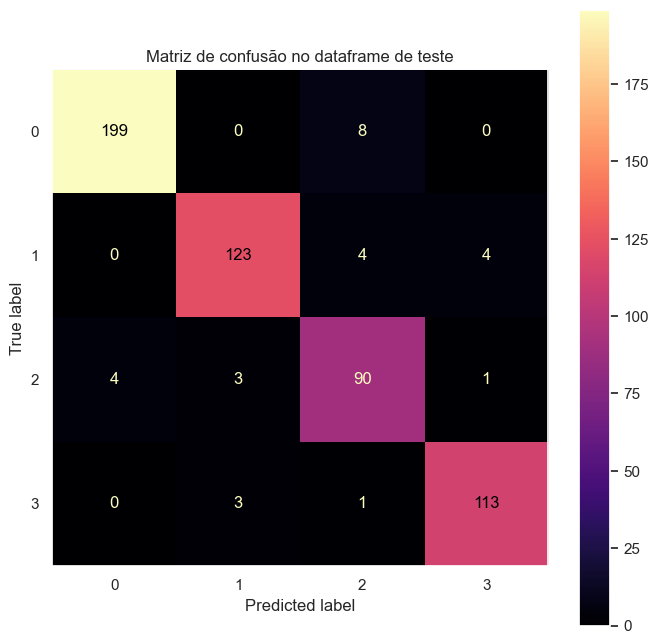

In [56]:
classificador_gs = xgb.XGBClassifier(booster="gbtree", learning_rate="0.01", max_depth=4, n_estimators=100, num_class=4)
modelo = fit(classificador_gs)
plot_matrix(modelo)
plot_matrix(modelo, treino=True)
confusion(modelo)

Salvando o modelo em disco

In [57]:
# joblib.dump(modelo, "./modelos/modelo_gs")

## Conclusão

Utilizando-se de técnicas de clusterização e de classificação com machine learning, fomos capazes de separar grupos com características semelhantes dentro de um dataset de campanha de marketing, identificando perfis relevantes e, após isso, efetivamente fomos capazes de prever esses perfis propriamente ditos com técnicas de classificação, conseguindo uma performance muito boa; o que pode indicar que esses perfis eram, de fato, relevantes; visto que o modelo não performou tão bem com outras quantidades de clusters e com outros métodos de agrupamento, como o PCA. Os resultados provenientes do método de extreme gradient boost foram satisfatórios, ultrapassando 95 de f1-score.